### Homework: NLP Fundamentals - Language Modeling, Tokenization, and Word Embeddings

#### Instructions:
- Complete the following exercises based on the lecture material.
- Submit your completed notebook with all cells executed.

---

## Part 1: Natural Language Processing and Language Modeling

### Question 1: Understanding Language Models
**(a)** Explain the difference between a probabilistic language model and a neural language model.
- Probabilistic language models use statistical approaches to predict what the next word in a sentence. This is a relatively straight forward process that does not require many computational resources, but has limited capabilities compared to neural models.
- Neural language models also produce probabilities, but they use deep learning approaches to process language while learning embeddings for words that capture semantics and meaning. The computational costs are much higher for neural language models, but they generalize to unseen content much better and capture long range and semantic relationships

**(b)** Consider the sentence:
  ```
  "Machine learning is transforming the world."
  ```
  Suppose a bigram language model assigns the following probabilities:
  - P("learning" | "Machine") = 0.2
  - P("is" | "learning") = 0.3
  - P("transforming" | "is") = 0.25
  - P("the" | "transforming") = 0.4
  - P("world" | "the") = 0.6
  
  Compute the probability of the full sentence under this bigram model.

`0.2x0.3x0.25x0.4x0.6=0.0036`

### Question 2: Implementing a Simple Neural Language Model
Modify the given code to train a simple unigram model on a sample text corpus.




In [2]:
from collections import Counter
import numpy as np

def train_unigram_model(text):
    words = text.lower().split()
    word_counts = Counter(words)
    total_words = sum(word_counts.values())
    word_probs = {word: np.log(count / total_words) for word, count in word_counts.items()}
    return word_probs

sample_text = "Language models are useful in many NLP applications. Language models can generate text."
word_probs = train_unigram_model(sample_text)
print(word_probs)

{'language': np.float64(-1.8718021769015913), 'models': np.float64(-1.8718021769015913), 'are': np.float64(-2.5649493574615367), 'useful': np.float64(-2.5649493574615367), 'in': np.float64(-2.5649493574615367), 'many': np.float64(-2.5649493574615367), 'nlp': np.float64(-2.5649493574615367), 'applications.': np.float64(-2.5649493574615367), 'can': np.float64(-2.5649493574615367), 'generate': np.float64(-2.5649493574615367), 'text.': np.float64(-2.5649493574615367)}


Modify the above function to return the log probabilities instead of raw probabilities. Why might log probabilities be preferred in NLP models?

- Log probabilities will avoid cases where probabilities close to zero become inaccurate due to the limitations of floating point math on computers. The products of probabilities also become addition, which is more efficient to compute.

---

## Part 2: Tokens and Tokenization

### Question 3: Tokenization in Practice
**(a)** Using the Hugging Face `transformers` library, tokenize the following sentence with the BERT tokenizer:

In [7]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
sentence = "Tokenization is a crucial step in NLP."
tokens = tokenizer(sentence, max_length=10, padding="max_length")
print(tokens["input_ids"])

[101, 19204, 3989, 2003, 1037, 10232, 3357, 1999, 17953, 2361, 1012, 102]


Modify this code to:
1. Convert tokens into their corresponding IDs.
2. Pad the tokenized sentence to a length of 10.

### Question 4: Custom Tokenization
Write a function that implements whitespace-based tokenization and filters out punctuation.

In [18]:
import re

STOP_WORDS = set(["is", "it", "the"])

def custom_tokenizer(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [t for t in tokens if t not in STOP_WORDS]

sample_text = "Tokenization! Is it important? Yes, it is."
print(custom_tokenizer(sample_text))

['tokenization', 'important', 'yes']


Modify the function to also remove stopwords (e.g., "is", "it", "the").

---

## Part 3: Word Embeddings

### Question 5: Word2Vec Training
Train a Word2Vec model on the given corpus using Gensim.

In [20]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.7 MB/s eta 0:00:00


In [24]:
from gensim.models import Word2Vec

corpus = [
    ["machine", "learning", "is", "amazing"],
    ["deep", "learning", "is", "a", "subset", "of", "machine", "learning"],
    ["word", "embeddings", "capture", "semantic", "relationships"]
]

model = Word2Vec(sentences=corpus, vector_size=20, window=2, min_count=1, workers=4)
model.train(corpus, total_examples=len(corpus), epochs=10)

print(model.wv["learning"])  # Print the embedding for the word "learning"
print(model.wv.most_similar("learning"))

[-0.00269558  0.0011878   0.02551733  0.04504069 -0.04651398 -0.03558286
  0.03230427  0.04485637 -0.02507012 -0.01881494  0.0369024  -0.00767737
 -0.02267811  0.0327739  -0.02430512 -0.00908551  0.01438059  0.00495579
 -0.04143033 -0.04724824]
[('capture', 0.3964294493198395), ('amazing', 0.2275078296661377), ('deep', 0.1455402821302414), ('relationships', 0.05591851472854614), ('is', 0.0501423105597496), ('word', -0.030720006674528122), ('semantic', -0.06501159816980362), ('a', -0.13732685148715973), ('subset', -0.16359534859657288), ('machine', -0.2928898334503174)]


Modify the script to:
1. Increase the embedding size to 20.
2. Find the most similar words to "learning" using `model.wv.most_similar("learning")`.

### Question 6: Visualizing Word Embeddings
Use PCA to visualize embeddings for the words in our corpus.

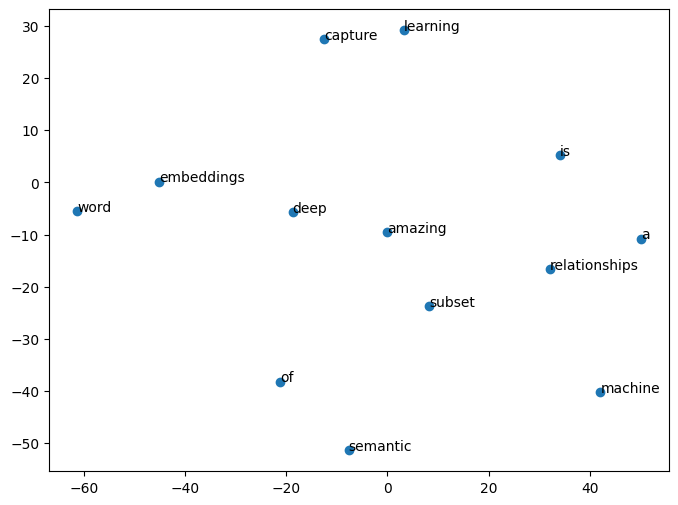

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(model.wv.key_to_index.keys())
word_vectors = np.array([model.wv[word] for word in words])

tsne = TSNE(n_components=2, perplexity=5)
reduced_vectors = tsne.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o')
for word, coord in zip(words, reduced_vectors):
    plt.annotate(word, xy=(coord[0], coord[1]))
plt.show()

Modify this visualization to use t-SNE instead of PCA.

---

### Submission
Submit your completed notebook with answers and executed code outputs. Ensure that all plots, tokenized outputs, and embeddings are included in your submission.